# Generating train data 

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)    

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

# Simple tf.keras Sequential Model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6517 - accuracy: 0.5513 - val_loss: 0.6372 - val_accuracy: 0.5952 - 840ms/epoch - 4ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6252 - accuracy: 0.6556 - val_loss: 0.6059 - val_accuracy: 0.7095 - 134ms/epoch - 707us/step
Epoch 3/30
189/189 - 0s - loss: 0.5928 - accuracy: 0.7265 - val_loss: 0.5777 - val_accuracy: 0.7429 - 126ms/epoch - 665us/step
Epoch 4/30
189/189 - 0s - loss: 0.5632 - accuracy: 0.7603 - val_loss: 0.5496 - val_accuracy: 0.7714 - 144ms/epoch - 764us/step
Epoch 5/30
189/189 - 0s - loss: 0.5342 - accuracy: 0.7873 - val_loss: 0.5229 - val_accuracy: 0.7857 - 154ms/epoch - 813us/step
Epoch 6/30
189/189 - 0s - loss: 0.5060 - accuracy: 0.8132 - val_loss: 0.4972 - val_accuracy: 0.8190 - 167ms/epoch - 884us/step
Epoch 7/30
189/189 - 0s - loss: 0.4785 - accuracy: 0.8354 - val_loss: 0.4725 - val_accuracy: 0.8429 - 120ms/epoch - 634us/step
Epoch 8/30
189/189 - 0s - loss: 0.4522 - accuracy: 0.8471 - val_loss: 0.4493 - val_accuracy: 0.8619 - 130ms/epoch

# Generating test data 

In [11]:
test_labels = []
test_samples = []

In [12]:
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)    

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [14]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

# Confusion matrix

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

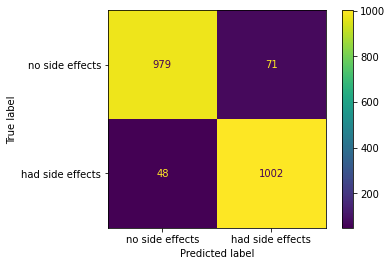

In [33]:
cm_plot_labels = ['no side effects', 'had side effects']
cmd = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
cmd.plot()